# WHO Life Expectancy Predictions using Multiple Linear Regression

### **Table of Contents**
* [<span style="color:#A690A4"> 0. Executive Summary](#exe_sum)
* [<span style="color:#A690A4"> 1. Introduction](#intro)
* [<span style="color:#A690A4"> 2. Collect, Wrangle & Explore](#process)
* [<span style="color:#A690A4"> 3. Predict Life Expectancy](#predict)

# <span style="color:#5E6997">Executive Summary</span> <a class="anchor" id="exe_sum"></a>

# <span style="color:#5E6997">Introduction</span> <a class="anchor" id="intro"></a>

# <span style="color:#5E6997">Collect, Wrangle, and Explore</span> <a class="anchor" id="process"></a>

Import needed libraries and load the dataset.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from mpl_toolkits.mplot3d import Axes3D
# import statsmodels.api as sm
# from scipy.stats import pearsonr
# from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from category_encoders.binary import BinaryEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('/kaggle/input/life-expectancy-who-updated/Life-Expectancy-Data-Updated.csv', encoding='ISO-8859-1')

df.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,21.2,...,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,74,25.3,...,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,27.0,...,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7


Check for null values.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      2864 non-null   object 
 1   Region                       2864 non-null   object 
 2   Year                         2864 non-null   int64  
 3   Infant_deaths                2864 non-null   float64
 4   Under_five_deaths            2864 non-null   float64
 5   Adult_mortality              2864 non-null   float64
 6   Alcohol_consumption          2864 non-null   float64
 7   Hepatitis_B                  2864 non-null   int64  
 8   Measles                      2864 non-null   int64  
 9   BMI                          2864 non-null   float64
 10  Polio                        2864 non-null   int64  
 11  Diphtheria                   2864 non-null   int64  
 12  Incidents_HIV                2864 non-null   float64
 13  GDP_per_capita    

Let's take a look at data coorelation.

In [4]:
correlation_matrix = df.corr(numeric_only=True)

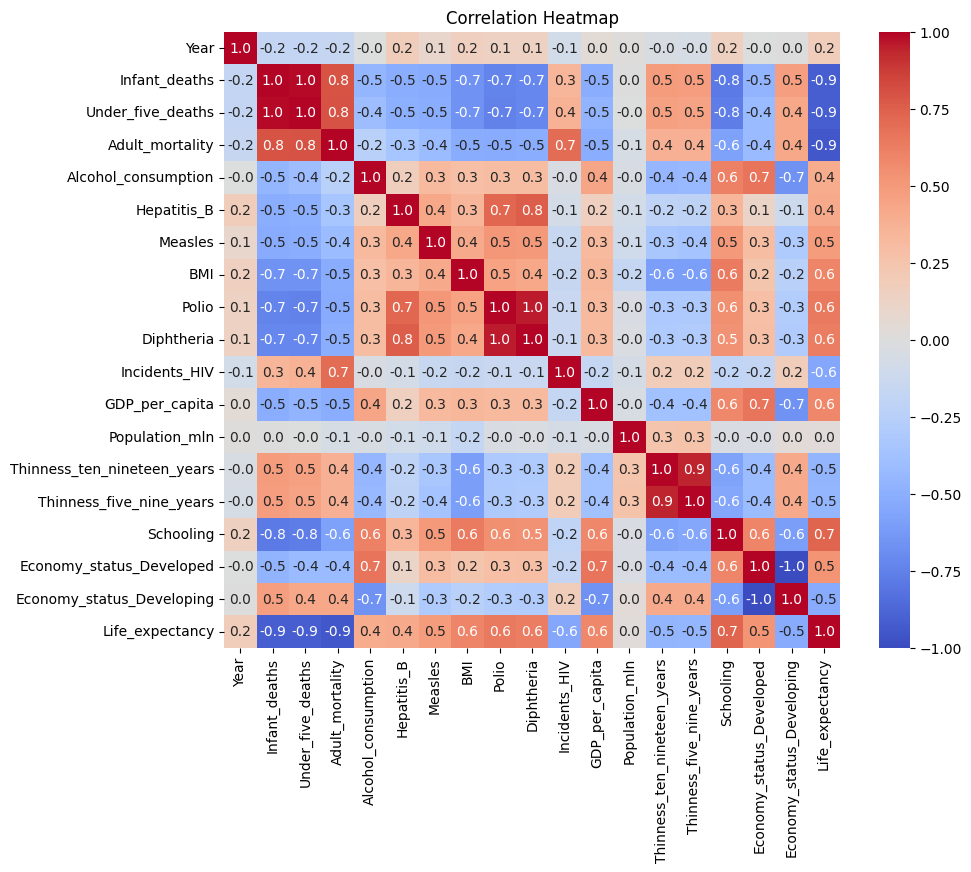

In [5]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f", square=True)
plt.title("Correlation Heatmap")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


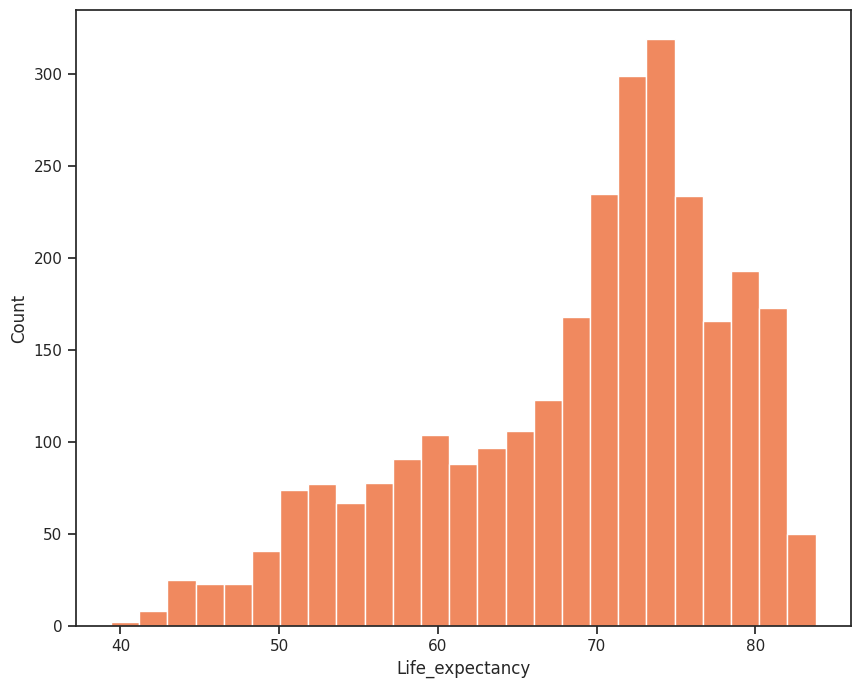

In [6]:
plt.figure(figsize=(10, 8), dpi=100)
sns.set(style='ticks')
sns.histplot(x='Life_expectancy', data=df, color='#eb612a');

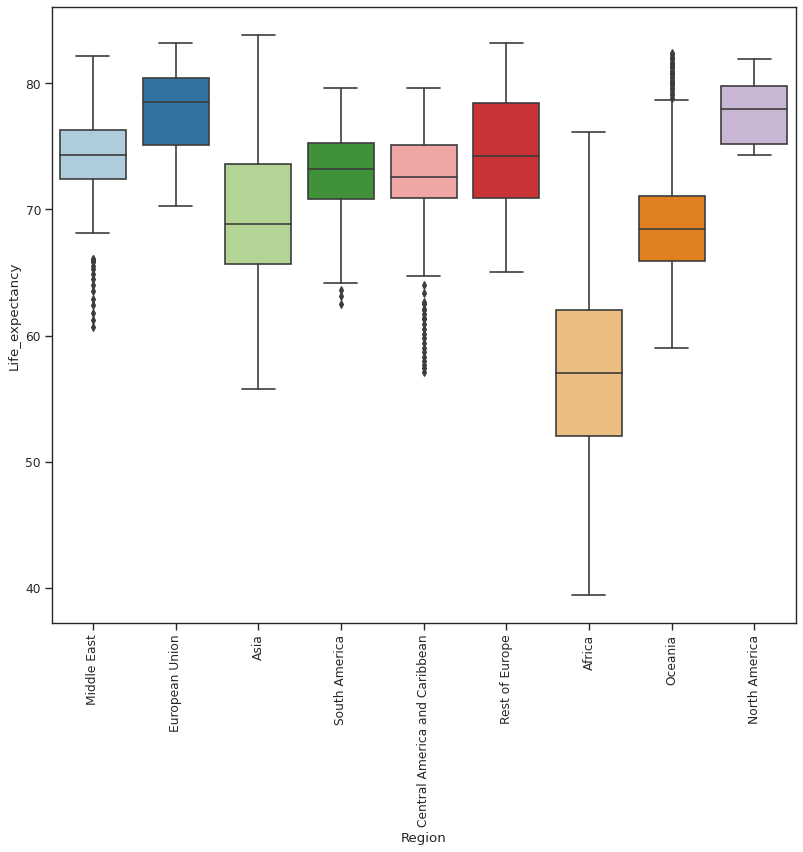

In [7]:
plt.figure(figsize=(12, 10), dpi=80)
sns.boxplot(x=df['Region'], y=df['Life_expectancy'], data=df, palette='Paired')
plt.xticks(rotation=90);

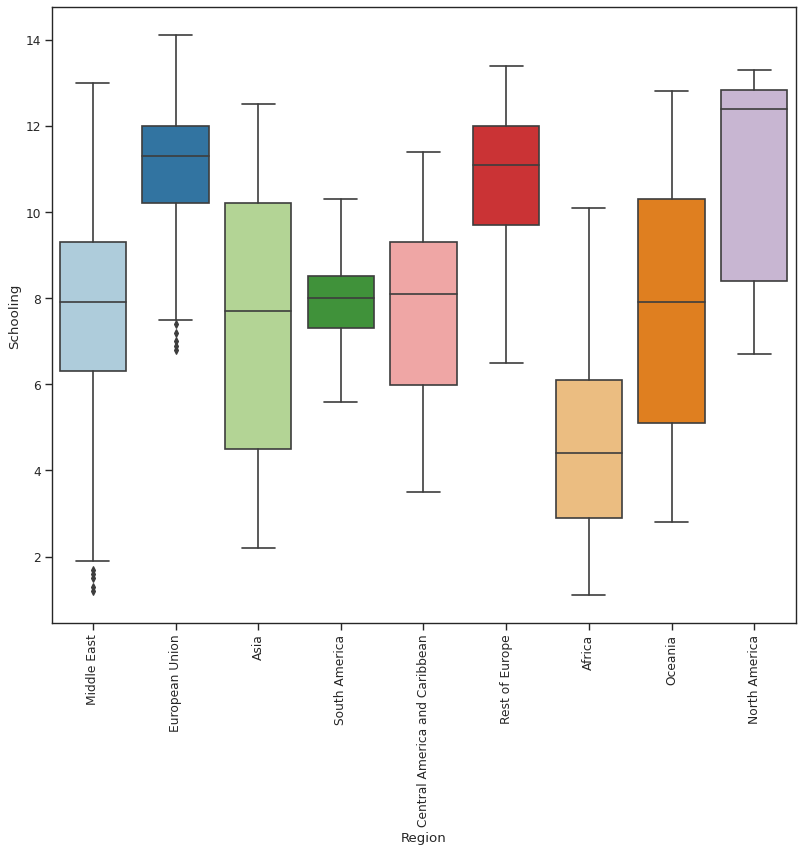

In [8]:
plt.figure(figsize=(12, 10), dpi=80)
sns.boxplot(x=df['Region'], y=df['Schooling'], data=df, palette='Paired')
plt.xticks(rotation=90);

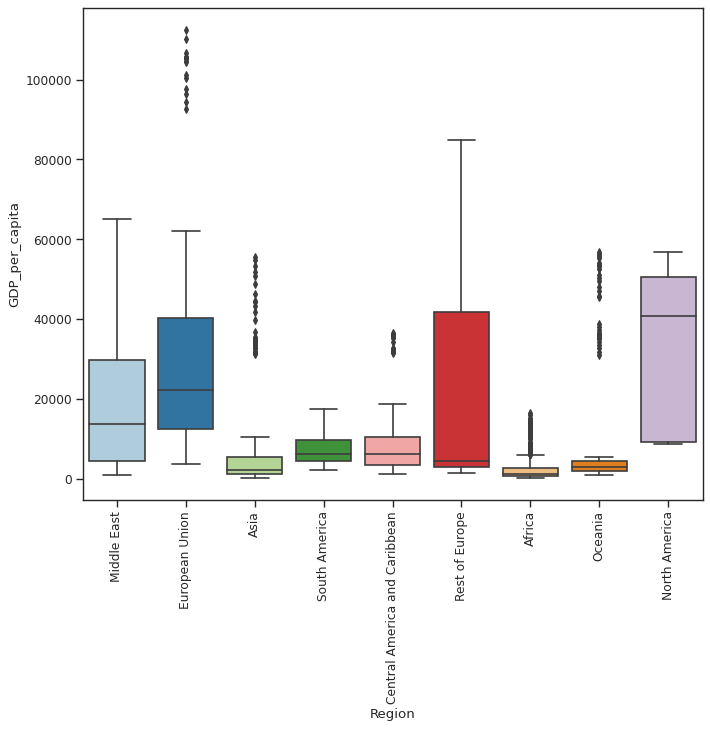

In [9]:
plt.figure(figsize=(10, 8), dpi=80)
sns.boxplot(x=df['Region'], y=df['GDP_per_capita'], data=df, palette='Paired')
plt.xticks(rotation=90);

Show the GDP for the last 50 countries.

In [10]:
df['Country'].nunique()

179

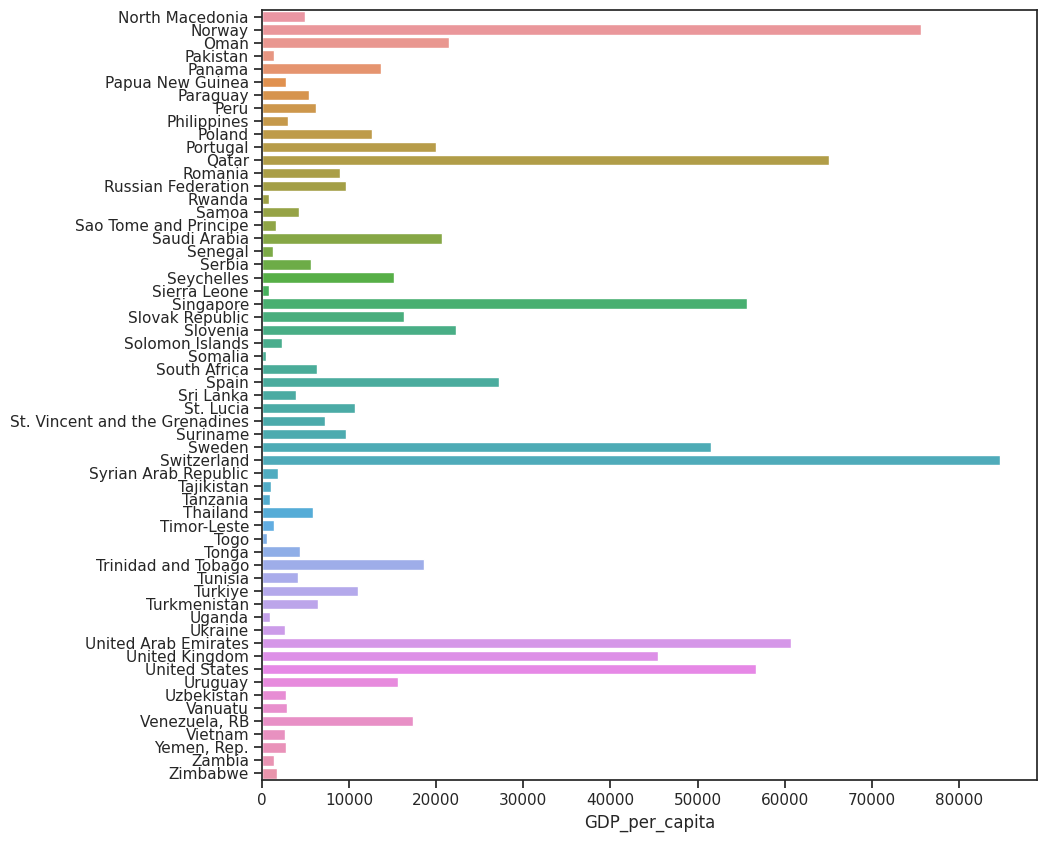

In [11]:
plt.figure(figsize=(10, 10), dpi=100)
sns.barplot(y=df.sort_values(by='Country')['Country'].unique()[120:179], x=df.groupby('Country')['GDP_per_capita'].max()[120:179]);

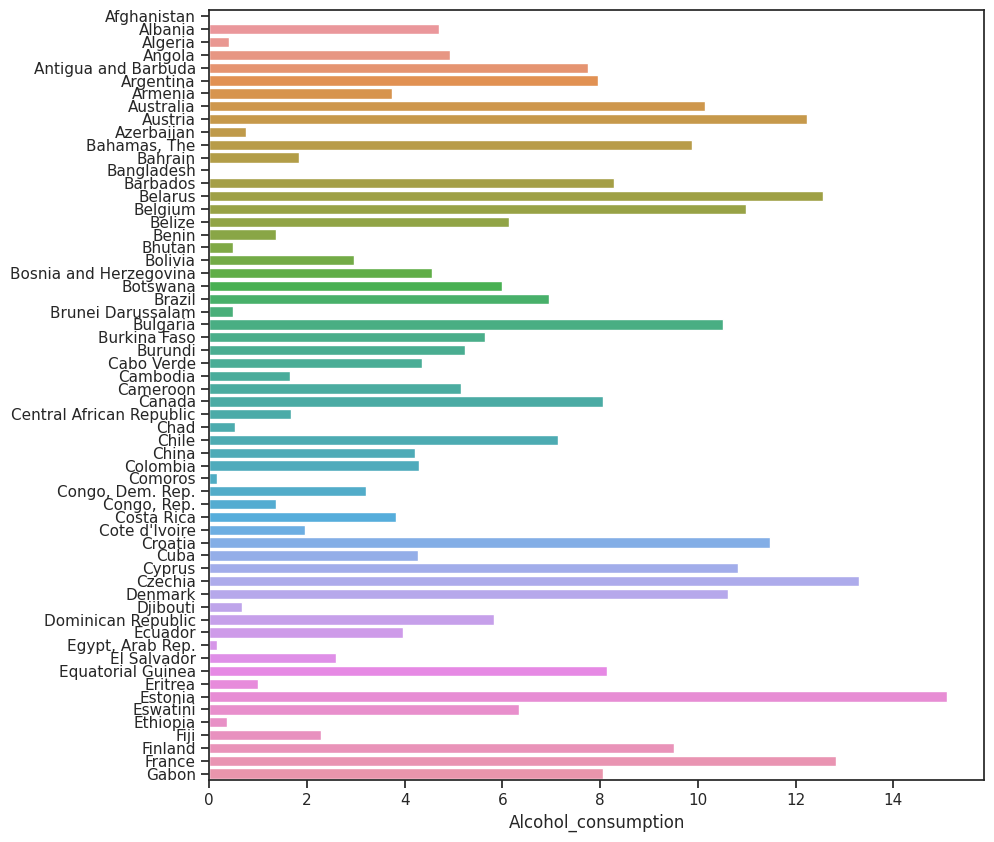

In [12]:
plt.figure(figsize=(10, 10), dpi=100)
sns.barplot(y=df.sort_values(by='Country')['Country'].unique()[:60], x=df.groupby('Country')['Alcohol_consumption'].mean()[:60]);

I will need to change the datatype of 'Country' and 'Region'.
Create dummy features to represent the 'Region' feature.

I will create dummy features to represent the 'Region' feature since there are few regions.

In [13]:
df = pd.get_dummies(df, columns=['Region'], prefix=['Region'], dtype=int)

In [14]:
df.head()

,Country,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,...,Life_expectancy,Region_Africa,Region_Asia,Region_Central America and Caribbean,Region_European Union,Region_Middle East,Region_North America,Region_Oceania,Region_Rest of Europe,Region_South America
0,Turkiye,2015,11.1,13.0,105.8240,1.32,97,65,27.8,97,...,76.5,0,0,0,0,1,0,0,0,0
1,Spain,2015,2.7,3.3,57.9025,10.35,97,94,26.0,97,...,82.8,0,0,0,1,0,0,0,0,0
2,India,2007,51.5,67.9,201.0765,1.57,60,35,21.2,67,...,65.4,0,1,0,0,0,0,0,0,0
3,Guyana,2006,32.8,40.5,222.1965,5.68,93,74,25.3,92,...,67.0,0,0,0,0,0,0,0,0,1
4,Israel,2012,3.4,4.3,57.9510,2.89,97,89,27.0,94,...,81.7,0,0,0,0,1,0,0,0,0


Create Train and Test data.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels=["Life_expectancy"], axis=1),
    df["Life_expectancy"],
    test_size=0.25,
    random_state=0,
)

I will Binary Encode 'Country' since there are over 100+ country entries. 

In [16]:
encoder = BinaryEncoder(cols=["Country"], drop_invariant=True)

In [17]:
encoder.fit(X_train)

X_train_enc = encoder.transform(X_train)
X_test_enc = encoder.transform(X_test)

In [18]:
X_train_enc.head()

,Country_0,Country_1,Country_2,Country_3,Country_4,Country_5,Country_6,Country_7,Year,Infant_deaths,...,Economy_status_Developing,Region_Africa,Region_Asia,Region_Central America and Caribbean,Region_European Union,Region_Middle East,Region_North America,Region_Oceania,Region_Rest of Europe,Region_South America
2122,0,0,0,0,0,0,0,1,2011,3.8,...,0,0,0,0,0,0,0,1,0,0
899,0,0,0,0,0,0,1,0,2012,4.9,...,0,0,0,0,0,0,1,0,0,0
1735,0,0,0,0,0,0,1,1,2000,85.0,...,1,1,0,0,0,0,0,0,0,0
2790,0,0,0,0,0,1,0,0,2007,8.1,...,1,0,0,0,0,1,0,0,0,0
794,0,0,0,0,0,1,0,1,2009,27.8,...,1,0,1,0,0,0,0,0,0,0


# <span style="color:#5E6997">Predict Life Expectancy</span> <a class="anchor" id="predict"></a>

Create the linear regression model.

In [19]:
regressor = LinearRegression()
regressor.fit(X_train_enc, y_train)

LinearRegression()

Make predictions.

In [20]:
y_pred = regressor.predict(X_test_enc)

Evaluate the model performance.

In [21]:
r2_score(y_test, y_pred)

0.9841480602299543

Best so far: 0.9841480602299543

In [22]:
# reg.score.(x,y)